# Trends over time 

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import time
import datetime
import os 
from tqdm import tqdm

In [10]:
place = "Linköping"
job_title = "Software Developer"
#data_dir = './results/pi-data/results/'
data_dir = './results/'

In [11]:
count = 0
for file in os.listdir(data_dir):
    if file.endswith('.csv') and place in file:
        #print(f'Processing file: {file}')
        count += 1
print(f'Total number of files for {place}: {count}')

Total number of files for Linköping: 9


In [12]:
all_jobs_dfs = []
for file in tqdm(os.listdir(data_dir)):
    if file.endswith('.csv') and place in file and file.startswith('jobs_'):
        date = file.split("_")[-1].replace('.csv','')
        df = pd.read_csv(os.path.join(data_dir, file))
        df['date'] = date
        all_jobs_dfs.append(df)
print(f'Total number of dataframes collected: {len(all_jobs_dfs)}')

100%|██████████| 33/33 [00:00<00:00, 4531.56it/s]

Total number of dataframes collected: 3


In [17]:
all_jobs_dfs[-1].head()

,job_title,company_name,location,time_posted,num_applicants,date
0,Embedded Software Developer,Softube AB,Linköping,3 weeks ago,0,2025-12-09
1,Developer: PC-plattformar & MCU-utveckling,Saab,Linköping,1 week ago,0,2025-12-09
2,System Developer to Linköping!,TMC Sweden,Linköping,3 weeks ago,33,2025-12-09
3,"Software Developer, Backend - Sectra Medical",Sectra,Linköping,1 week ago,0,2025-12-09
4,Software Engineer,Voyado,Norrköping,3 days ago,66,2025-12-09


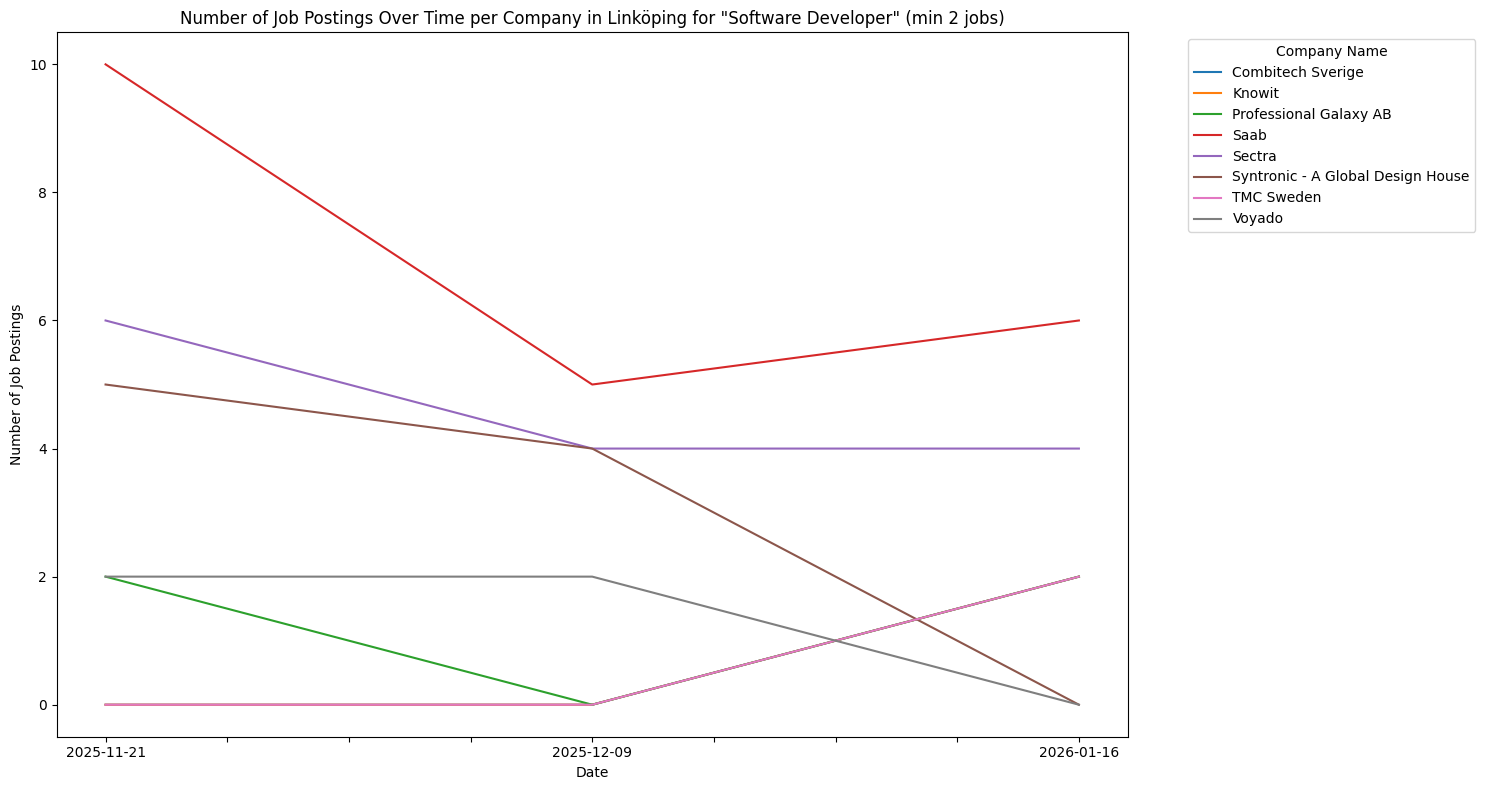

In [36]:
minimum_number_of_jobs = 2
jobs_over_time = pd.concat(all_jobs_dfs)
jobs_over_time_grouped = jobs_over_time.groupby(['date', 'company_name']).size().reset_index(name='job_count')
jobs_over_time_grouped = jobs_over_time_grouped[jobs_over_time_grouped['job_count'] >= minimum_number_of_jobs]
jobs_over_time_pivot = jobs_over_time_grouped.pivot(index='date', columns='company_name', values='job_count').fillna(0)
jobs_over_time_pivot.plot(kind='line', figsize=(15, 8))
plt.title(f'Number of Job Postings Over Time per Company in {place} for "{job_title}" (min {minimum_number_of_jobs} jobs)')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.legend(title='Company Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

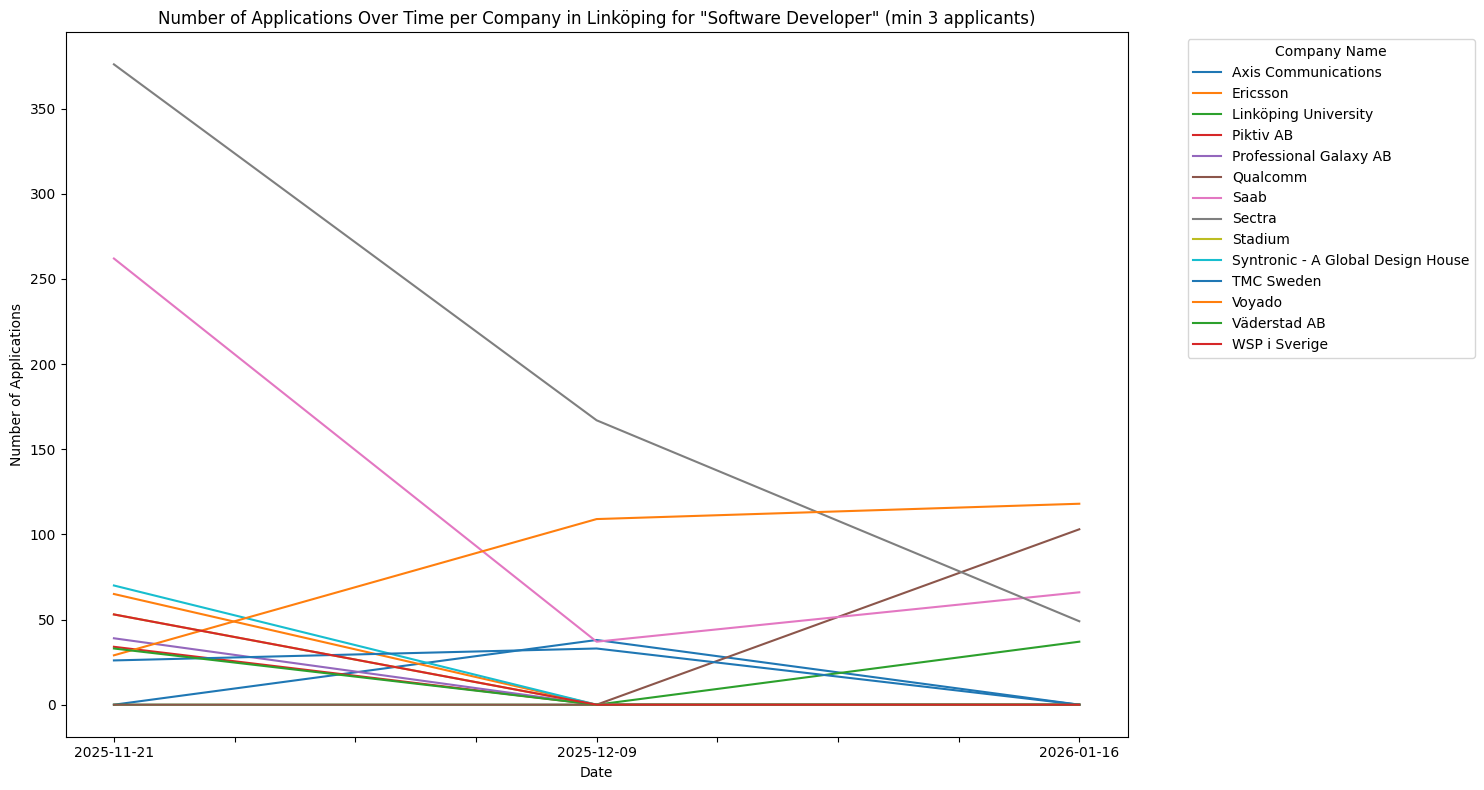

In [37]:
# We want to look at the number of applications per company over time
minimum_number_of_application = 3
applications_over_time = pd.concat(all_jobs_dfs)
applications_over_time.groupby(['date', 'company_name'])['num_applicants'].sum().reset_index(name='total_applications')
applications_over_time_grouped = applications_over_time.groupby(['date', 'company_name'])['num_applicants'].sum().reset_index(name='total_applications')
applications_over_time_grouped = applications_over_time_grouped[applications_over_time_grouped['total_applications'] >= minimum_number_of_application]
applications_over_time_pivot = applications_over_time_grouped.pivot(index='date', columns='company_name', values='total_applications').fillna(0)
applications_over_time_pivot.plot(kind='line', figsize=(15, 8))
plt.title(f'Number of Applications Over Time per Company in {place} for "{job_title}" (min {minimum_number_of_application} applicants)')
plt.xlabel('Date')
plt.ylabel('Number of Applications')
plt.legend(title='Company Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show() 